In [1]:
import acoular
ts = acoular.TimeSamples( name="three_sources.h5" )
ts

In [2]:
print( ts.numchannels, ts.numsamples, ts.sample_freq )

64 51200 51200.0


In [3]:
ps = acoular.PowerSpectra( time_data=ts, block_size=1024)

In [4]:
ps.csm.shape

[('three_sources_cache.h5', 1)]


(513, 64, 64)

In [5]:
from os import path
micgeofile = path.join(path.split(acoular.__file__)[0],'xml','array_64.xml')
mg = acoular.MicGeom( from_file=micgeofile )
mg.mpos

array([[ 0.152 ,  0.134 ,  0.1043,  0.0596,  0.0798,  0.0659,  0.0262,
         0.0272,  0.    ,  0.004 ,  0.0162,  0.0162,  0.004 , -0.0112,
        -0.018 , -0.0112, -0.145 , -0.1294, -0.1242, -0.1209, -0.0828,
        -0.0631, -0.0595, -0.034 ,  0.0056,  0.0037, -0.016 , -0.0492,
        -0.0024,  0.0022, -0.0267, -0.0054, -0.0874, -0.0764, -0.049 ,
        -0.0058, -0.0429, -0.0378,  0.0003, -0.0121, -0.1864, -0.1651,
        -0.1389, -0.1016, -0.1008, -0.0809, -0.0475, -0.0369,  0.1839,
         0.1634,  0.146 ,  0.1235,  0.1019,  0.0799,  0.0594,  0.0393,
         0.0774,  0.0697,  0.0778,  0.0944,  0.0473,  0.0338,  0.0478,
         0.0218],
       [ 0.1141,  0.1021,  0.1036,  0.1104,  0.0667,  0.0497,  0.0551,
         0.0286,  0.    , -0.0175, -0.0078,  0.0078,  0.0175,  0.0141,
         0.    , -0.0141,  0.1228,  0.1079,  0.0786,  0.0335,  0.0629,
         0.0531,  0.0133,  0.0202,  0.1899,  0.1685,  0.1461,  0.1155,
         0.104 ,  0.0825,  0.0548,  0.0391, -0.1687, -0.150

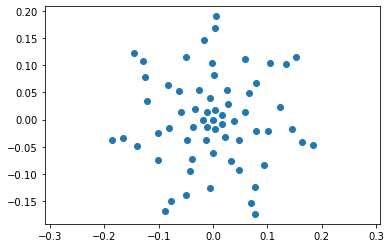

In [7]:
%matplotlib inline
import matplotlib.pylab as plt

plt.plot( mg.mpos[0], mg.mpos[1], 'o' )
plt.axis( 'equal' );

In [8]:
rg = acoular.RectGrid( x_min=-0.2, x_max=0.2,
                       y_min=-0.2, y_max=0.2,
                       z=0.3, increment=0.01 )
rg.pos()

array([[-0.2 , -0.2 , -0.2 , ...,  0.2 ,  0.2 ,  0.2 ],
       [-0.2 , -0.19, -0.18, ...,  0.18,  0.19,  0.2 ],
       [ 0.3 ,  0.3 ,  0.3 , ...,  0.3 ,  0.3 ,  0.3 ]])

In [9]:
st = acoular.SteeringVector( grid=rg, mics=mg )
st.env.c

343.0

In [10]:
bb = acoular.BeamformerBase( freq_data=ps, steer=st )

In [14]:
pm = bb.synthetic( 10000, 3 )
Lm = acoular.L_p( pm )

In [15]:
print(Lm.shape)
print(Lm)

(41, 41)
[[-350.         -350.         -350.         ... -350.
    51.22101859   63.62266209]
 [-350.         -350.         -350.         ... -350.
    57.32615195   64.51236527]
 [  41.71234794 -350.         -350.         ...   49.19605438
    62.00431164   63.32414059]
 ...
 [-350.           63.48982507   67.38535323 ...   65.97445017
    67.89554472   70.53175578]
 [  55.34514593   66.02525054   67.29804136 ...   65.92144996
    64.27623848   66.63722495]
 [  62.00092581   65.56621427   65.99123246 ...   61.87940208
    62.73136523   59.59736012]]


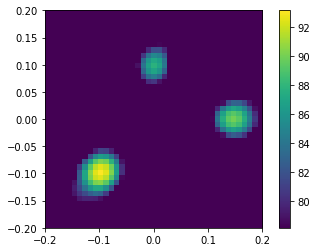

In [16]:
plt.figure()
plt.imshow( Lm.T, origin="lower", vmin=Lm.max()-15, extent=rg.extend() )
plt.colorbar();